In [2]:
import pandas as pd

# Load the stress dataset
df_stress = pd.read_csv("/content/StressLevelDataset.csv")

# Basic inspection
print("Shape of dataset:", df_stress.shape)

print("\nColumn names:")
print(df_stress.columns)

print("\nFirst 5 rows:")
print(df_stress.head())

print("\nData types:")
print(df_stress.dtypes)

print("\nMissing values:")
print(df_stress.isnull().sum())


Shape of dataset: (1100, 12)

Column names:
Index(['anxiety_level', 'mental_health_history', 'depression', 'headache',
       'sleep_quality', 'breathing_problem', 'living_conditions',
       'academic_performance', 'study_load', 'future_career_concerns',
       'extracurricular_activities', 'stress_level'],
      dtype='object')

First 5 rows:
   anxiety_level  mental_health_history  depression  headache  sleep_quality  \
0             14                      0          11         2              2   
1             15                      1          15         5              1   
2             12                      1          14         2              2   
3             16                      1          15         4              4   
4             16                      0           7         2              5   

   breathing_problem  living_conditions  academic_performance  study_load  \
0                  4                  3                     3           2   
1                 

In [3]:
# Inspect stress_level distribution
print("Stress level value counts:")
print(df_stress["stress_level"].value_counts())

print("\nStress level percentage:")
print(df_stress["stress_level"].value_counts(normalize=True) * 100)

# Basic statistics
print("\nStress level summary:")
print(df_stress["stress_level"].describe())


Stress level value counts:
stress_level
0    373
2    369
1    358
Name: count, dtype: int64

Stress level percentage:
stress_level
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64

Stress level summary:
count    1100.000000
mean        0.996364
std         0.821673
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: stress_level, dtype: float64


In [4]:
# Map stress_level to regulation states
def map_stress_regulation(level):
    if level == 0:
        return 0   # Regulated
    elif level == 1:
        return 1   # Monitoring
    else:
        return 2   # Dysregulated

df_stress["Stress_Regulation_Label"] = df_stress["stress_level"].apply(map_stress_regulation)

# Check distribution
print("Stress Regulation Label Distribution:")
print(df_stress["Stress_Regulation_Label"].value_counts())

print("\nPercentage:")
print(df_stress["Stress_Regulation_Label"].value_counts(normalize=True) * 100)


Stress Regulation Label Distribution:
Stress_Regulation_Label
0    373
2    369
1    358
Name: count, dtype: int64

Percentage:
Stress_Regulation_Label
0    33.909091
2    33.545455
1    32.545455
Name: proportion, dtype: float64


In [5]:
# Basic descriptive stats
print(df_stress.describe())


       anxiety_level  mental_health_history   depression     headache  \
count    1100.000000            1100.000000  1100.000000  1100.000000   
mean       11.063636               0.492727    12.555455     2.508182   
std         6.117558               0.500175     7.727008     1.409356   
min         0.000000               0.000000     0.000000     0.000000   
25%         6.000000               0.000000     6.000000     1.000000   
50%        11.000000               0.000000    12.000000     3.000000   
75%        16.000000               1.000000    19.000000     3.000000   
max        21.000000               1.000000    27.000000     5.000000   

       sleep_quality  breathing_problem  living_conditions  \
count    1100.000000        1100.000000        1100.000000   
mean        2.820909           2.753636           2.518182   
std         1.638293           1.400713           1.119208   
min         0.000000           0.000000           0.000000   
25%         1.000000           2

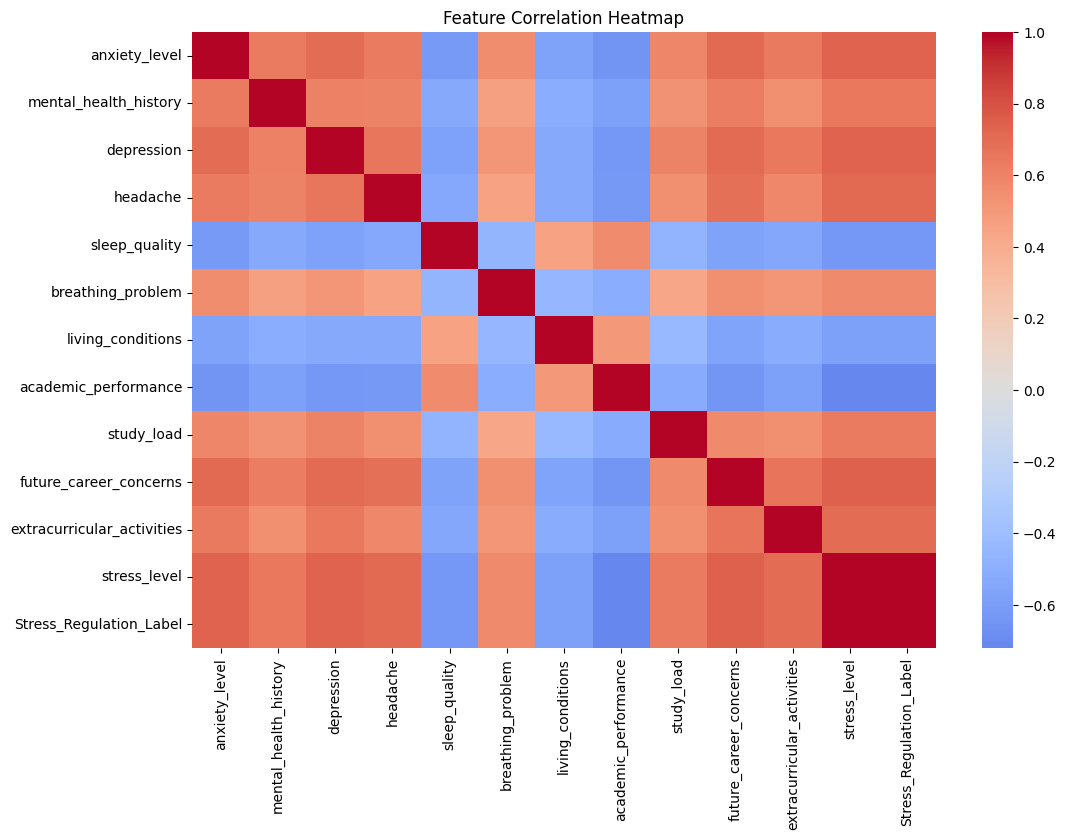

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df_stress.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
# Correlation with Stress_Regulation_Label
corr_target = (
    df_stress
    .corr(numeric_only=True)["Stress_Regulation_Label"]
    .sort_values(ascending=False)
)

print("Correlation with Stress_Regulation_Label:\n")
print(corr_target)


Correlation with Stress_Regulation_Label:

stress_level                  1.000000
Stress_Regulation_Label       1.000000
future_career_concerns        0.742619
anxiety_level                 0.736795
depression                    0.734379
headache                      0.713484
extracurricular_activities    0.692977
mental_health_history         0.648644
study_load                    0.634156
breathing_problem             0.573984
living_conditions            -0.581723
sleep_quality                -0.629114
academic_performance         -0.720922
Name: Stress_Regulation_Label, dtype: float64


In [8]:
# Define feature matrix (drop label columns only)
X = df_stress.drop(
    columns=["stress_level", "Stress_Regulation_Label"]
)

y = df_stress["Stress_Regulation_Label"]

print("Feature columns used:")
print(X.columns)


Feature columns used:
Index(['anxiety_level', 'mental_health_history', 'depression', 'headache',
       'sleep_quality', 'breathing_problem', 'living_conditions',
       'academic_performance', 'study_load', 'future_career_concerns',
       'extracurricular_activities'],
      dtype='object')


In [9]:
from sklearn.model_selection import train_test_split

X = df_stress[
    [
        'future_career_concerns',
        'anxiety_level',
        'depression',
        'headache',
        'extracurricular_activities',
        'mental_health_history',
        'study_load',
        'breathing_problem',
        'living_conditions',
        'sleep_quality',
        'academic_performance'
    ]
]

y = df_stress["Stress_Regulation_Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTrain distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))


Train shape: (880, 11)
Test shape: (220, 11)

Train distribution:
Stress_Regulation_Label
0    0.339773
2    0.335227
1    0.325000
Name: proportion, dtype: float64

Test distribution:
Stress_Regulation_Label
0    0.336364
2    0.336364
1    0.327273
Name: proportion, dtype: float64


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ---- Scale features (important for Logistic Regression) ----
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Logistic Regression (multiclass) ----
log_reg = LogisticRegression(
    max_iter=2000,
    multi_class="multinomial",
    solver="lbfgs"
)

log_reg.fit(X_train_scaled, y_train)

# ---- Predictions ----
y_pred_lr = log_reg.predict(X_test_scaled)

# ---- Evaluation ----
print("Logistic Regression Accuracy:")
print(accuracy_score(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred_lr,
    target_names=["Regulated", "Monitoring", "Dysregulated"]
))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy:
0.8590909090909091

Classification Report:
              precision    recall  f1-score   support

   Regulated       0.91      0.81      0.86        74
  Monitoring       0.79      0.92      0.85        72
Dysregulated       0.90      0.85      0.88        74

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220


Confusion Matrix:
[[60  9  5]
 [ 4 66  2]
 [ 2  9 63]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---- Random Forest for Stress Regulation ----
rf_stress = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf_stress.fit(X_train, y_train)

# ---- Predictions ----
y_pred_rf = rf_stress.predict(X_test)

# ---- Evaluation ----
print("Random Forest Accuracy:")
print(accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred_rf,
    target_names=["Regulated", "Monitoring", "Dysregulated"]
))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy:
0.8909090909090909

Classification Report:
              precision    recall  f1-score   support

   Regulated       0.88      0.82      0.85        74
  Monitoring       0.93      0.93      0.93        72
Dysregulated       0.86      0.92      0.89        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220


Confusion Matrix:
[[61  4  9]
 [ 3 67  2]
 [ 5  1 68]]


In [12]:
# Predict class probabilities
stress_probs = rf_stress.predict_proba(X_test)

# Create results dataframe
stress_results = X_test.copy()
stress_results["True_Label"] = y_test.values

# Probability columns (order matches classes 0,1,2)
stress_results["Prob_Regulated"] = stress_probs[:, 0]
stress_results["Prob_Monitoring"] = stress_probs[:, 1]
stress_results["Prob_Dysregulated"] = stress_probs[:, 2]

print(stress_results.head())


      future_career_concerns  anxiety_level  depression  headache  \
150                        1              8           1         1   
582                        1              7           4         1   
450                        5             15          19         5   
616                        4             20          26         4   
1090                       1              6          24         4   

      extracurricular_activities  mental_health_history  study_load  \
150                            2                      0           2   
582                            1                      0           1   
450                            5                      1           5   
616                            5                      1           5   
1090                           0                      0           3   

      breathing_problem  living_conditions  sleep_quality  \
150                   2                  3              5   
582                   1             

In [13]:
# Stress Regulation Score (0–100)
stress_results["Stress_Regulation_Score"] = (
    (stress_results["Prob_Regulated"] +
     0.5 * stress_results["Prob_Monitoring"]) * 100
).round(2)

print(stress_results["Stress_Regulation_Score"].describe())


count    220.000000
mean      49.455455
std       36.513349
min        0.000000
25%        0.617500
50%       50.000000
75%      100.000000
max      100.000000
Name: Stress_Regulation_Score, dtype: float64


In [14]:
# Rolling trend (7-sample window)
stress_results["Stress_Trend_7"] = (
    stress_results["Stress_Regulation_Score"]
    .rolling(window=7)
    .mean()
)

print(stress_results[["Stress_Regulation_Score", "Stress_Trend_7"]].tail())


      Stress_Regulation_Score  Stress_Trend_7
1084                    44.42       42.018571
554                     52.10       35.175714
369                    100.00       49.461429
176                      0.00       35.175714
936                    100.00       42.388571


In [15]:
import pickle

# Bundle everything needed for inference
stress_model_bundle = {
    "model": rf_stress,   # trained Random Forest
    "features": X_train.columns.tolist(),
    "class_mapping": {
        0: "Regulated",
        1: "Monitoring",
        2: "Dysregulated"
    }
}

# Save to .pkl file
with open("stress_regulation_model.pkl", "wb") as f:
    pickle.dump(stress_model_bundle, f)

print("✅ Stress Regulation Model saved as stress_regulation_model.pkl")


✅ Stress Regulation Model saved as stress_regulation_model.pkl
